In [119]:
from pylab import*
from scipy.io import wavfile

In [120]:
sampFreq, snd = wavfile.read("/Users/user/Desktop/praat/u.wav", "r")

In [121]:
snd.dtype

dtype('int16')

In [122]:
snd = snd / (2.**15)

In [123]:
snd.shape

(12656,)

In [124]:
s1 = snd.tolist()

In [125]:
timeArray = arange(0, float(snd.shape[0]), 1)
timeArray = timeArray / sampFreq
timeArray = timeArray * 1000  #scale to milliseconds

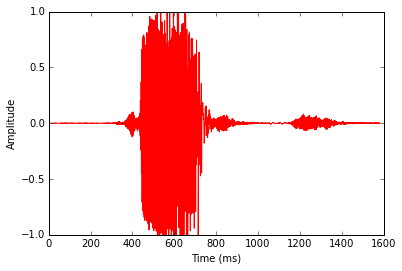

In [126]:
plot(timeArray, snd, color='r')
ylabel('Amplitude')
xlabel('Time (ms)')
pass

In [127]:
n = len(s1) 
p = fft(s1) # take the fourier transform 

In [128]:
nUniquePts = ceil((n+1)/2.0)
p = p[0:nUniquePts]
p = abs(p)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


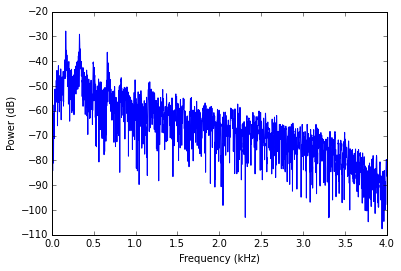

In [129]:
p = p / float(n) 

p = p**2

if n % 2 > 0: 
    p[1:len(p)] = p[1:len(p)] * 2
else:
    p[1:len(p) -1] = p[1:len(p) - 1] * 2 

freqArray = arange(0, nUniquePts, 1.0) * (sampFreq/float(n));
plot(freqArray/1000, 10*log10(p), color='b')
xlabel('Frequency (kHz)')
ylabel('Power (dB)')
pass